In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:

# Random seed used in different points of this document
RANDOM_SEED = 16
np.random.seed(RANDOM_SEED)

In [3]:
def get_colors(img_path: str):
    """Get all the colors from an image by following the given path.
    Args:
        img_path (str): The image path to be open and generate the colors from.
    Returns:
        array: All the colors available in the image.
        numpy array: The main image in numpy array format.
    """
    image = Image.open(img_path).convert("RGB")
    image = np.array(image)
    colors = image.reshape(image.shape[0] * image.shape[1], 3)
    return colors, image

In [4]:
def kmeans_model(algorithm_colors):
    """A function that uses the colours of an image as input for a KMeans model to group them in 10 clusters and return them.

    Args:
        algorithm_colors (numpy.ndarray): A list of 5000 colours radomly chosen from the image.

    Returns:
        sklearn.cluster._kmeans.KMeans: The train Kmeans model.
        numpy.ndarray: The centers of the clusters generated by the model.
    """
    model = KMeans(init="random", n_clusters=10, random_state=RANDOM_SEED)
    model.fit(algorithm_colors)
    return model, model.cluster_centers_

In [5]:
def rgb2hex(palette_rgb):
    """A program that transforms a RGB palette into a HEX palette.
    Args:
        palette_rgb (list): The palette of colors in RGB to be converted in HEX.
    Returns:
        list: The list of converted collors in HEX format.
    """
    return "#%02x%02x%02x" % palette_rgb

In [6]:
def order_palette(palette_rgb):
    """This function helps order the colors so that the resulting palette is more usefull and pleasent visually.

    Args:
        palette_rgb (list): The choosen colors to represent the image and create the palette.

    Returns:
        list of tuples: A list of 10 tuples representing the final color palette.
    """
    # Find all possible permutations in the RGB palette
    permutations = list(itertools.permutations(palette_rgb))

    # Calculate adjacent color distances by aplying the Euclidean distance formula
    permutations = np.array(permutations)  # Passing the permutations to np.array
    distances = np.sqrt(
        ((permutations[:, :-1] - permutations[:, 1:]) ** 2).sum(axis=-1)
    ).sum(
        axis=-1
    )  # Euclidean distance formula
    index_min = (
        distances.argmin()
    )  # Getting the minimum distance between all the distances

    # Find the permutation with min distance
    ordered_palette = permutations[index_min]
    return [tuple(color) for color in ordered_palette.tolist()]

In [8]:
def compress_img(image, model):
    """A program that compress the image based on the model centroids.

    Args:
        image (numpy array): The image used to get the colors and train the model.
        model (sklearn.cluster._kmeans.KMeans): The trained model.

    Returns:
        numpy.ndarray: A compressed version of the image.
    """
    image_flat = image.reshape(-1, 3)
    labels = model.predict(image_flat)
    new_colors = model.cluster_centers_[labels]
    image_compressed = new_colors.reshape(image.shape)
    return image_compressed

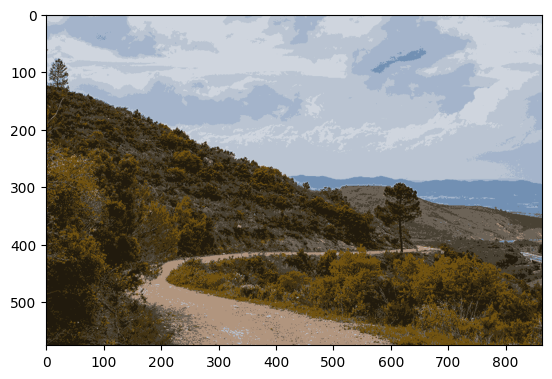

In [15]:
image_path = "/Users/mariamagdalenabalos/Desktop/Python/Python Exercises/day_92/static/uploads/covalta.jpg"

# Get the colors og the image
colors, image = get_colors(image_path)

# Choose some colors for the algorithm and run the algorithm
algorithm_colors = colors[np.random.choice(colors.shape[0], 5000, replace=False)]
model, centers = kmeans_model(algorithm_colors=algorithm_colors)

# Generate a sorted RGB color palette
palette_rgb = order_palette(palette_rgb=centers.astype(int))


# # Compress the image with the laels generated by the model
img_compresed = compress_img(image, model)

# # #Show the compressed image
plt.imshow(img_compresed / 255)
plt.show()

# Save the compressed image
# compressed_image = Image.fromarray((img_compresed).astype(np.uint8))
# compressed_image.save('compressed_image.jpg')